In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('food_atlas_combined.csv')
data.index=data.FIPS
data.drop('FIPS',axis=1,inplace=True)
data.head()

,State,County,PCT_LACCESS_POP10,PCT_LACCESS_LOWI10,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10,PCT_LACCESS_HHNV10,GROCPTH07,SUPERCPTH07,CONVSPTH07,...,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC10,POVRATE10,PERPOV10,CHILDPOVRATE10,PERCHLDPOV10,METRO13,POPLOSS00,PCT_OBESE_ADULTS10
FIPS,,,,,,,,,,,,,,,,,,,,,
1001,AL,Autauga,33.769657,9.793530,8.837112,4.376378,3.284786,0.080266,0.020067,0.742465,...,11.995382,26.777959,53049,11.9,0,17.5,0,1,0,30.5
1003,AL,Baldwin,19.318473,5.460261,4.343199,3.513570,2.147827,0.133090,0.017360,1.093655,...,16.771185,22.987408,47618,13.3,0,20.2,0,1,0,26.6
1005,AL,Barbour,20.840972,11.420316,3.425062,2.805166,4.135869,0.201776,0.000000,0.437181,...,14.236807,21.906982,33074,25.3,1,36.2,1,0,0,37.3
1007,AL,Bibb,4.559753,2.144661,1.087518,0.657008,3.458580,0.325809,0.000000,0.372353,...,12.681650,22.696923,35472,20.9,0,28.6,1,1,0,34.3
1009,AL,Blount,2.700840,1.062468,0.671490,0.340269,3.269380,0.105511,0.017585,0.263778,...,14.722096,24.608353,42906,16.5,0,24.1,0,1,0,30.4


### Description of the columns with the variable types is below

Index|FieldName|Type|Unit|Description
----|---------|----|-----------
0|State|object|string|U.S. State
1|County|object|string|U.S. County
2|PCT_LACCESS_POP10|Percent|float|Population, low access to store (%), 2010
3|PCT_LACCESS_LOWI10|Percent|float|Low income & low access to store (%), 2010
4|PCT_LACCESS_CHILD10|Percent|float|Children, low access to store (%), 2010
5|PCT_LACCESS_SENIORS10|Percent|float|Seniors, low access to store (%), 2010
6|PCT_LACCESS_HHNV10|Percent|float|Households, no car & low access to store (%), 2010
7|GROCPTH07|# per 1,000 pop|float|Grocery stores/1,000 pop, 2007
8|SUPERCPTH07|# per 1,000 pop|float|Supercenters & club stores/1,000 pop, 2007
9|CONVSPTH07|# per 1,000 pop|float|Convenience stores/1,000 pop, 2007
10|SPECSPTH07|# per 1,000 pop|float|Specialized food stores/1,000 pop, 2007
11|SNAPSPTH08|# per 1,000 pop|float|SNAP-authorized stores/1,000 pop, 2008
12|WICSPTH08|# per 1,000 pop|float|WIC-authorized stores/1,000 pop, 2008
13|FFRPTH07|# per 1,000 pop|float|Fast-food restaurants/1,000 pop, 2007
14|FSRPTH07|# per 1,000 pop|float|Full-service restaurants/1,000 pop, 2007
15|PC_FFRSALES07|Dollars|float|Expenditures per capita, fast food, 2007 (State level)
16|PC_FSRSALES07|Dollars|float|Expenditures per capita, restaurants, 2007 (State level)
17|PCT_SNAP09|Percent|float|SNAP participants (% pop), 2009  (State level)
18|SNAP_PART_RATE10|Percent|float|SNAP participants (% eligible pop), 2010  (State level)
19|SNAP_OAPP10|Classification|float (0, 0.5 or 1)|SNAP online application, 2010  (State level)
20|SNAP_FACEWAIVER10|Classification|float (0, 0.5 or 1)|SNAP face interview waiver, 2010  (State level)
21|SNAP_VEHEXCL10|Classification|integer (0 or 1)|SNAP vehicle exclusion, 2010  (State level)
22|SNAP_BBCE10|Classification|integer (0 or 1)|SNAP Broad-based Categorical Eligibility, 2010  (State level)
23|SNAP_REPORTSIMPLE10|Classification|integer (0 or 1)|SNAP simplified reporting, 2010  (State level)
24|PCT_NSLP09|Percent|float|National School Lunch Program participants (% pop), 2009  (State level)
25|PCT_FREE_LUNCH10|Percent|float|Students eligible for free lunch (%), 2010
26|PCT_REDUCED_LUNCH10|Percent|float|Students eligible for reduced-price lunch (%), 2010
27|PCT_SBP09|Percent|float|School Breakfast Program participants (% pop), 2009  (State level)
28|PCT_SFSP09|Percent|float|Summer Food Service Program participants (% pop), 2009  (State level)
29|PCT_WIC09|Percent|float|WIC participants (% pop), 2009  (State level)
30|PCT_CACFP09|Percent|float|Child & Adult Care (% pop), 2009  (State level)
31|FOODINSEC_07_09|Percent|float|Household food insecurity (%, three-year average), 2007-09  (State level)
32|VLFOODSEC_07_09|Percent|float|Household very low food security (%, three-year average), 2007-09  (State level)
33|FOODINSEC_CHILD_01_07|Percent|float|Child food insecurity (% households, multiple-year average), 2001-07  (State level)
34|MILK_PRICE10|Ratio|float|Price of low-fat milk/national average, 2010 (Region level)
35|SODA_PRICE10|Ratio|float|Price of sodas/national average, 2010  (Region level)
36|MILK_SODA_PRICE10|Ratio|float|Price of low-fat milk/price of sodas, 2010  (Region level)
37|PCT_LOCLFARM07|Percent|float|Farms with direct sales (%), 2007
38|FMRKTPTH09|# per 1,000 pop|float|Farmers' markets/1,000 pop, 2009
39|VEG_FARMS07|Count|integer|Vegetable farms, 2007
40|FRESHVEG_FARMS07|Count|integer|Farms with vegetables harvested for fresh market, 2007
41|ORCHARD_FARMS07|Count|integer|Orchard farms, 2007
42|BERRY_FARMS07|Count|integer|Berry farms, 2007
43|SLHOUSE07|Count|integer|Small slaughterhouse facilities, 2007
44|GHVEG_FARMS07|Count|integer|Greenhouse vegetable and fresh herb farms, 2007
45|CSA07|Count|integer|CSA farms, 2007
46|AGRITRSM_OPS07|Count|integer|Agritourism operations
47|FARM_TO_SCHOOL|Classification|integer (0 or 1)|Farm to school program, 2009
48|RECFACPTH07|# per 1,000 pop|float|Recreation & fitness facilities/1,000 pop, 2007
49|NATAMEN|Legend|integer|ERS natural amenity index, 1999
50|PCT_NHWHITE10|Percent|float|% White, 2010
51|PCT_NHBLACK10|Percent|float|% Black, 2010
52|PCT_HISP10|Percent|float|% Hispanic, 2010
53|PCT_NHASIAN10|Percent|float|% Asian, 2010
54|PCT_NHNA10|Percent|float|% American Indian or Alaska Native, 2010
55|PCT_NHPI10|Percent|float|% Hawaiian or Pacific Islander, 2010
56|PCT_65OLDER10|Percent|float|% Population 65 years or older, 2010
57|PCT_18YOUNGER10|Percent|float|% Population under age 18, 2010
58|MEDHHINC10|Dollars|integer|Median household income, 2010
59|POVRATE10|Percent|float|Poverty rate, 2010
60|PERPOV10|Legend|integer (0 or 1)|Persistent-poverty counties, 2010
61|CHILDPOVRATE10|Percent|float|Child poverty rate, 2010
62|PERCHLDPOV10|Legend|integer (0 or 1)|Persistent-child-poverty counties, 2010
63|METRO13|Legend|integer (0 or 1)|Metro/nonmetro counties, 2010
64|POPLOSS00|Legend|integer (0 or 1)|Population-loss counties, 2000
65|PCT_OBESE_ADULTS10|Percent|float|Adult obesity rate (county), 2010

In [3]:
# Remove rows where the outcome variable is NULL
data.dropna(axis=0,subset=['PCT_OBESE_ADULTS10'],inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3138 entries, 1001 to 56045
Data columns (total 66 columns):
State                    3138 non-null object
County                   3138 non-null object
PCT_LACCESS_POP10        3138 non-null float64
PCT_LACCESS_LOWI10       3138 non-null float64
PCT_LACCESS_CHILD10      3138 non-null float64
PCT_LACCESS_SENIORS10    3138 non-null float64
PCT_LACCESS_HHNV10       3138 non-null float64
GROCPTH07                3138 non-null float64
SUPERCPTH07              3138 non-null float64
CONVSPTH07               3138 non-null float64
SPECSPTH07               3138 non-null float64
SNAPSPTH08               3138 non-null float64
WICSPTH08                3138 non-null float64
FFRPTH07                 3138 non-null float64
FSRPTH07                 3138 non-null float64
PC_FFRSALES07            3138 non-null float64
PC_FSRSALES07            3138 non-null float64
PCT_SNAP09               3138 non-null float64
SNAP_PART_RATE10         3138 non-null float6

In [5]:
# several columns that contain integers or floats have type "object"
# let's check why
data['MEDHHINC10'].sort_values()

FIPS
24027    100992
51059    102726
51610    105124
35028    105987
51107    119075
46017     20577
1131      21611
21189     22335
28051     22536
28021     22750
48507     22948
13141     23887
21051     24081
54047     24133
28053     24205
48427     24497
45005     24615
28063     24671
21147     24691
28103     24699
1105      24742
47067     24891
21129     24908
28125     24987
22035     25442
28119     25507
28151     25559
22065     25565
1119      25586
46137     25669
          ...  
24003     80908
48397     81113
36103     81235
34037     81330
24037     81559
13117     81629
27019     81935
51075     81938
18057     82054
47187     82273
6041      82383
6081      82413
36079     82585
24017     83078
51061     83176
51600     83413
42029     83829
6085      84627
39041     85628
24009     86536
24031     88559
36059     90294
51153     91290
34027     91403
51179     93185
51013     93231
34035     93777
34019     97532
8035      97806
15005    <Null>
Name: MEDHHINC10, d

In [6]:
# convert columns with type 'object' info float and coers invalid values to NaN
data[['MEDHHINC10','POVRATE10','CHILDPOVRATE10',
      'POPLOSS00']]=data[['MEDHHINC10',
                          'POVRATE10','CHILDPOVRATE10','POPLOSS00']].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [7]:
data[['MEDHHINC10','POVRATE10','CHILDPOVRATE10','POPLOSS00']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3138 entries, 1001 to 56045
Data columns (total 4 columns):
MEDHHINC10        3137 non-null float64
POVRATE10         3137 non-null float64
CHILDPOVRATE10    3137 non-null float64
POPLOSS00         3137 non-null float64
dtypes: float64(4)
memory usage: 122.6 KB


In [8]:
# Summary Table - transpose for ease of reading
summary_table = data.describe().transpose()
summary_table

C:\Users\elena.bohenick\AppData\Local\Continuum\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
PCT_LACCESS_POP10,3138.0,23.555276,20.235190,0.000000,10.859792,19.682744,29.582072,100.000001
PCT_LACCESS_LOWI10,3138.0,8.374341,8.207588,0.000000,3.446590,6.152361,10.326246,72.274456
PCT_LACCESS_CHILD10,3138.0,5.505827,4.879299,0.000000,2.402072,4.443521,6.967697,34.015595
PCT_LACCESS_SENIORS10,3138.0,3.916292,4.215682,0.000000,1.586095,2.827374,4.524318,29.208633
PCT_LACCESS_HHNV10,3138.0,3.146667,3.177494,0.000000,1.609824,2.571179,3.800336,68.470405
GROCPTH07,3138.0,0.287277,0.242450,0.000000,0.160234,0.223715,0.332228,3.231018
SUPERCPTH07,3138.0,0.010118,0.017496,0.000000,0.000000,0.000000,0.016631,0.261370
CONVSPTH07,3138.0,0.889925,0.601808,0.000000,0.583352,0.765090,1.026206,13.937282
SPECSPTH07,3138.0,0.066315,0.086329,0.000000,0.000000,0.051071,0.096477,1.273885
SNAPSPTH08,3138.0,0.690002,0.363803,0.000000,0.452050,0.626818,0.852741,5.748133


## Outliers

In [9]:
data.PCT_OBESE_ADULTS10.describe()

count    3138.000000
mean       30.553952
std         4.242072
min        13.100000
25%        28.300000
50%        30.700000
75%        33.100000
max        47.900000
Name: PCT_OBESE_ADULTS10, dtype: float64

(array([   3.,    2.,    2.,    3.,    4.,    5.,    5.,   11.,    6.,
          10.,   18.,   20.,   26.,   27.,   43.,   48.,   54.,   67.,
          70.,   89.,  128.,  186.,  207.,  271.,  199.,  206.,  247.,
         229.,  198.,  174.,  139.,   86.,  109.,   67.,   49.,   35.,
          24.,   14.,   15.,   11.,   14.,    6.,    3.,    1.,    3.,
           2.,    0.,    0.,    0.,    2.]),
 array([ 13.1  ,  13.796,  14.492,  15.188,  15.884,  16.58 ,  17.276,
         17.972,  18.668,  19.364,  20.06 ,  20.756,  21.452,  22.148,
         22.844,  23.54 ,  24.236,  24.932,  25.628,  26.324,  27.02 ,
         27.716,  28.412,  29.108,  29.804,  30.5  ,  31.196,  31.892,
         32.588,  33.284,  33.98 ,  34.676,  35.372,  36.068,  36.764,
         37.46 ,  38.156,  38.852,  39.548,  40.244,  40.94 ,  41.636,
         42.332,  43.028,  43.724,  44.42 ,  45.116,  45.812,  46.508,
         47.204,  47.9  ]),
 <a list of 50 Patch objects>)

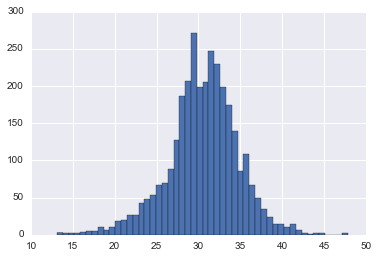

In [10]:
plt.hist(data['PCT_OBESE_ADULTS10'],bins=50)

In [11]:
# calculate bottom and top values for 3 STD from the mean for the outcome variable
bottom_border=data.PCT_OBESE_ADULTS10.mean()-3*data.PCT_OBESE_ADULTS10.std()
top_border=data.PCT_OBESE_ADULTS10.mean()+3*data.PCT_OBESE_ADULTS10.std()
print bottom_border
print top_border

17.8277364085
43.2801667146


In [12]:
data[(data.PCT_OBESE_ADULTS10<bottom_border) | (data.PCT_OBESE_ADULTS10>top_border)].sort_values('PCT_OBESE_ADULTS10')

,State,County,PCT_LACCESS_POP10,PCT_LACCESS_LOWI10,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10,PCT_LACCESS_HHNV10,GROCPTH07,SUPERCPTH07,CONVSPTH07,...,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC10,POVRATE10,PERPOV10,CHILDPOVRATE10,PERCHLDPOV10,METRO13,POPLOSS00,PCT_OBESE_ADULTS10
FIPS,,,,,,,,,,,,,,,,,,,,,
56039,WY,Teton,29.174527,4.975409,5.147907,3.086168,1.374848,0.249091,0.000000,2.640363,...,9.852541,19.141542,68358.0,9.0,0,14.0,0,0,0.0,13.1
8037,CO,Eagle,15.267278,4.227530,3.836535,0.825025,0.938510,0.296630,0.019775,2.412593,...,5.628676,24.522482,69182.0,8.5,0,12.0,0,0,0.0,13.2
8107,CO,Routt,25.768225,5.058761,5.107161,1.970184,1.469035,0.223814,0.000000,2.820054,...,8.120294,20.881365,60506.0,7.7,0,9.9,0,0,0.0,13.4
35049,NM,Santa Fe,31.956449,10.481339,7.752102,4.045412,1.350989,0.153450,0.006975,1.143901,...,15.123812,20.972463,48507.0,16.5,0,23.6,0,1,0.0,13.8
8097,CO,Pitkin,10.255021,1.571791,1.848497,1.318624,0.701230,0.331148,0.000000,3.775084,...,11.453231,17.488920,65568.0,7.0,0,7.9,0,0,0.0,14.2
8117,CO,Summit,28.962759,6.128222,5.802728,1.817766,2.303955,0.343066,0.000000,3.697492,...,7.708795,17.446596,60087.0,10.1,0,12.9,0,0,0.0,14.5
8013,CO,Boulder,15.569675,2.842225,3.927944,1.552966,0.566456,0.152186,0.010146,1.007809,...,10.021829,21.303812,62215.0,13.6,0,13.8,0,1,0.0,14.9
49043,UT,Summit,20.450462,3.728572,5.842479,1.778793,1.136042,0.451353,0.000000,2.482440,...,7.620306,27.722718,74535.0,7.6,0,11.9,0,0,0.0,15.3
6041,CA,Marin,16.400308,1.976601,3.107662,2.837880,0.505331,0.260057,0.004063,1.259651,...,16.715727,20.686267,82383.0,9.2,0,10.9,0,1,0.0,15.4


### There are 32 rows with outliers in the outcome variable

In [13]:
# Access and Proximity to Grocery Store variable

In [14]:
data.iloc[:,[2,3,4,5,6,65]].corr()

,PCT_LACCESS_POP10,PCT_LACCESS_LOWI10,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10,PCT_LACCESS_HHNV10,PCT_OBESE_ADULTS10
PCT_LACCESS_POP10,1.000000,0.901754,0.960273,0.919712,0.114729,-0.113432
PCT_LACCESS_LOWI10,0.901754,1.000000,0.890276,0.826691,0.274475,0.032501
PCT_LACCESS_CHILD10,0.960273,0.890276,1.000000,0.823314,0.159146,-0.077827
PCT_LACCESS_SENIORS10,0.919712,0.826691,0.823314,1.000000,0.039796,-0.111729
PCT_LACCESS_HHNV10,0.114729,0.274475,0.159146,0.039796,1.000000,0.284630
PCT_OBESE_ADULTS10,-0.113432,0.032501,-0.077827,-0.111729,0.284630,1.000000


#### All  'Access and Proximity' predictor variables with the exception of PCT_LACCESS_HHNV10 are highly correlated

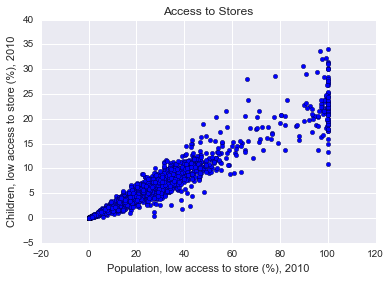

In [15]:
# create a scatter plot for two variables with high correlation
plt.scatter(data.PCT_LACCESS_POP10, data.PCT_LACCESS_CHILD10)
plt.xlabel('Population, low access to store (%), 2010')
plt.ylabel('Children, low access to store (%), 2010')
plt.title('Access to Stores')

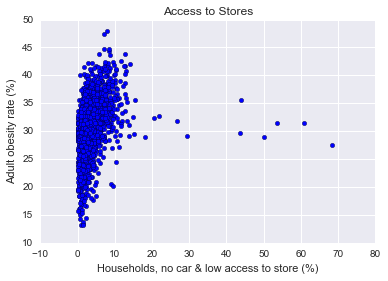

In [16]:
# create a scatter plot of a predicor variable with the highest corelation to outcome variable (corr=0.28)
plt.scatter(data.PCT_LACCESS_HHNV10, data.PCT_OBESE_ADULTS10)
plt.xlabel('Households, no car & low access to store (%)')
plt.ylabel('Adult obesity rate (%)')
plt.title('Access to Stores')

In [17]:
# Run correlations with all variables
# see the top 10 predicotrs (i.e. highest correlation with the outcome variable)
corr = data.corr()
corr['PCT_OBESE_ADULTS10'].sort_values(ascending=False).head(6)

PCT_OBESE_ADULTS10    1.000000
PCT_FREE_LUNCH10      0.482506
CHILDPOVRATE10        0.461212
PCT_SNAP09            0.452115
POVRATE10             0.451313
PCT_NHBLACK10         0.410628
Name: PCT_OBESE_ADULTS10, dtype: float64

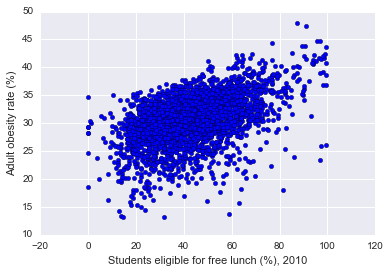

In [18]:
# create scatterplot of the most correlated variable
plt.scatter(data.PCT_FREE_LUNCH10, data.PCT_OBESE_ADULTS10)
plt.xlabel('Students eligible for free lunch (%), 2010')
plt.ylabel('Adult obesity rate (%)')

In [19]:
# compute the average of obesity rate for Persistent-poverty counties predictor
data.groupby(['PERPOV10'])[['PCT_OBESE_ADULTS10']].mean()

,PCT_OBESE_ADULTS10
PERPOV10,
0,30.037235
1,34.630595


In [20]:
# compute the average of obesity rate for Persistent-child-poverty counties counties
data.groupby(['PERCHLDPOV10'])[['PCT_OBESE_ADULTS10']].mean()

,PCT_OBESE_ADULTS10
PERCHLDPOV10,
0,29.763045
1,33.268503


## Check for multicollinearity

In [21]:
corr=data.iloc[:,2:65].corr()

In [22]:
# get eigen values for predictor variables
w, v = np.linalg.eig(corr)
eigen_val=pd.DataFrame({'feauture':corr.columns,'epigen_value':w})
eigen_val

,epigen_value,feauture
0,9.171406,PCT_LACCESS_POP10
1,6.668475,PCT_LACCESS_LOWI10
2,4.706570,PCT_LACCESS_CHILD10
3,3.716789,PCT_LACCESS_SENIORS10
4,2.859512,PCT_LACCESS_HHNV10
5,2.638578,GROCPTH07
6,2.198662,SUPERCPTH07
7,1.955105,CONVSPTH07
8,1.851970,SPECSPTH07
9,1.619937,SNAPSPTH08


In [23]:
# get predictors with eigen values close to zero
eigen_val[eigen_val.epigen_value < 0.01]

,epigen_value,feauture
32,-0.001795,MILK_PRICE10
33,0.001715,SODA_PRICE10
34,0.009059,MILK_SODA_PRICE10


In [24]:
columns=data.iloc[:,2:65].columns.values

In [25]:
# get eigen vectors for features with eigen values close to zero
vectors=pd.DataFrame({'1Feature':columns,'MILK_PRICE10':v[:,32],'SODA_PRICE10':v[:,33],'MILK_SODA_PRICE10':v[:,34]})
vectors

,1Feature,MILK_PRICE10,MILK_SODA_PRICE10,SODA_PRICE10
0,PCT_LACCESS_POP10,-0.036280,-0.785258,0.003621
1,PCT_LACCESS_LOWI10,0.002317,0.020977,0.003138
2,PCT_LACCESS_CHILD10,0.015995,0.498894,-0.003511
3,PCT_LACCESS_SENIORS10,0.005710,0.318648,-0.001367
4,PCT_LACCESS_HHNV10,0.025053,0.004261,-0.003685
5,GROCPTH07,-0.004071,-0.006580,-0.000096
6,SUPERCPTH07,0.000009,0.001494,-0.000696
7,CONVSPTH07,0.004518,0.024929,-0.018456
8,SPECSPTH07,-0.003483,-0.003955,0.000470
9,SNAPSPTH08,0.002070,-0.004015,-0.001360


In [26]:
# get features with eigen vectors that are NOT close to zero (i.e. strongly correlated with each other)
vectors.iloc[:,1:]=vectors.iloc[:,1:].abs()

In [27]:
vectors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 4 columns):
1Feature             63 non-null object
MILK_PRICE10         63 non-null float64
MILK_SODA_PRICE10    63 non-null float64
SODA_PRICE10         63 non-null float64
dtypes: float64(3), object(1)
memory usage: 2.0+ KB


In [28]:
vectors[vectors.MILK_PRICE10 >=0.1].iloc[:,0:2].sort_values('MILK_PRICE10',ascending=False)

,1Feature,MILK_PRICE10
48,PCT_NHWHITE10,0.656357
49,PCT_NHBLACK10,0.454949
50,PCT_HISP10,0.429716
52,PCT_NHNA10,0.272094
32,MILK_PRICE10,0.149616
34,MILK_SODA_PRICE10,0.125672
33,SODA_PRICE10,0.109043


In [29]:
vectors[vectors.MILK_SODA_PRICE10 >=0.1].iloc[:,[0,2]].sort_values('MILK_SODA_PRICE10',ascending=False)

,1Feature,MILK_SODA_PRICE10
0,PCT_LACCESS_POP10,0.785258
2,PCT_LACCESS_CHILD10,0.498894
3,PCT_LACCESS_SENIORS10,0.318648
55,PCT_18YOUNGER10,0.106396


In [30]:
vectors[vectors.SODA_PRICE10 >=0.1].iloc[:,[0,3]].sort_values('SODA_PRICE10',ascending=False)

,1Feature,SODA_PRICE10
34,MILK_SODA_PRICE10,0.693766
32,MILK_PRICE10,0.623387
33,SODA_PRICE10,0.275581
48,PCT_NHWHITE10,0.155665
50,PCT_HISP10,0.104430
49,PCT_NHBLACK10,0.101795


### Summary

- Records with the response variable = NULL were removed from the dataset

- Numerical columns that contained string values were converted to foat and string values were converted to NULLs

- Obesity rates have normal distribution. Outliers are present on both bottom and top end of the value range

- Many predicor variables have outliers - check if removing outliers will improve model preformace

- Some of the predictor variables are highly correlated

- Multicollinearity test (using eigenvalues and eigenvectors) returned sets of collinear variables. Only one of the variables in a set of collinear variables should be used in the model

- Counties with high powerty rates have ~5% higher obesity rates than counties with lower poverty rates as was stated in the hypothesis